In [8]:
import numpy as np
from sklearn.cross_validation import train_test_split
from PIL import Image
import os

class NotMNIST:
    def __init__(self):
        images, labels = [], []

        for i, letter in enumerate(['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J']):
            directory = 'notMNIST_large/%s/' % letter
            files = os.listdir(directory)
            label = np.array([0]*10)
            label[i] = 1
            i = 0
            for file in files:
                try:
                    i+=1
                    im = Image.open(directory+file)
                    if i % 20000 == 0:
                        print("ok")
                except:
                    print ("Skip a corrupted file: " + file)
                    continue
                pixels = np.array(im.convert('L').getdata())
                images.append(pixels/255.0)
                labels.append(label)
          
        train_images, test_images, train_labels, test_labels = \
            train_test_split(images, labels, test_size=0.2, random_state=0)
        
        class train:
            def __init__(self):
                self.images = []
                self.labels = []
                self.batch_counter = 0
                
            def next_batch(self, num):
                if self.batch_counter + num >= len(self.labels):
                    batch_images = self.images[self.batch_counter:]
                    batch_labels = self.labels[self.batch_counter:]
                    left = num - len(batch_labels)
                    batch_images.extend(self.images[:left])
                    batch_labels.extend(self.labels[:left])
                    self.batch_counter = left
                else:
                    batch_images = self.images[self.batch_counter:self.batch_counter+num]
                    batch_labels = self.labels[self.batch_counter:self.batch_counter+num]                  
                    self.batch_counter += num
                    
                return (batch_images, batch_labels)
                    
        class test:
            def __init__(self):
                self.images = []
                self.labels = []
                
        self.train = train()
        self.test = test()
                
        self.train.images = train_images
        self.train.labels = train_labels
        self.test.images = test_images
        self.test.labels = test_labels

/Users/yamamotomasaomi/.pyenv/versions/anaconda3-5.1.0/lib/python3.6/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [ ]:
mnist=NotMNIST()
!store mnist

Skip a corrupted file: .DS_Store
ok
Skip a corrupted file: Um9tYW5hIEJvbGQucGZi.png
ok
Skip a corrupted file: SG90IE11c3RhcmQgQlROIFBvc3Rlci50dGY=.png
ok
ok
Skip a corrupted file: TmlraXNFRi1TZW1pQm9sZEl0YWxpYy5vdGY=.png
ok
ok
ok
Skip a corrupted file: VHJhbnNpdCBCb2xkLnR0Zg==.png
ok
ok
ok
ok
ok


In [3]:
#  必要な素材の収集
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from __future__ import division
import sys, os, pickle
import numpy.random as rd

from scipy.misc import imread

import matplotlib.pyplot as plt

# ランダムシードの作成
np.random.seed(20160703)
tf.set_random_seed(20160703)


# その他コンフィグ（いつもの）
%config IPCompleter.greedy=True
%matplotlib inline
%matplotlib notebook

#画像取り込みデータのオープン
# !ls session_MNIST_Image*

In [4]:
num_units = 1024

x = tf.placeholder(tf.float32, [None, 784])

w1 = tf.Variable(tf.truncated_normal([784, num_units]))
b1 = tf.Variable(tf.zeros([num_units]))
hidden1 = tf.nn.relu(tf.matmul(x, w1)+b1)

w0 = tf.Variable(tf.zeros([num_units,10]))
b0 = tf.Variable(tf.zeros([10]))
p = tf.nn.softmax(tf.matmul(hidden1, w0) + b0)

In [5]:
t = tf.placeholder(tf.float32, [None, 10])
loss = -tf.reduce_sum(t * tf.log(p))
train_step = tf.train.AdamOptimizer(0.0001).minimize(loss)
correct_prediction = tf.equal(tf.arg_max(p, 1), tf.arg_max(t, 1))
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))

Instructions for updating:
Use `argmax` instead


In [6]:
sess = tf.InteractiveSession()
sess.run(tf.global_variables_initializer())

In [7]:
i=0
time = []
loss_val , acc_val = [], []
loss_vals, acc_vals = [], []

for _ in range (2000):
    i+=1
    batch_xs, batch_ts = mnist.train.next_batch(50)
    sess.run(train_step,feed_dict={x:batch_xs, t: batch_ts})
    time.append(i)
#     loss_val, acc_val = sess.run([loss,accuracy],feed_dict={x:mnist.test.images[start:end],t:mnist.test.labels[start:end]})
#     np.append(loss_val,loss_vals)
#     np.append(acc_val,acc_vals)
    
    if i % 500 == 0:
        for c in range(4):
            start = len(mnist.test.images) // 4 * c
            end = len(mnist.test.images) // 4 * (c+1)
            loss_val, acc_val = sess.run([loss,accuracy],feed_dict={x:mnist.test.images[start:end],t:mnist.test.labels[start:end]})
            np.append(loss_val,loss_vals)
            np.append(acc_val,acc_vals)
        loss_val = np.sum(loss_vals)
        acc_val = np.mean(acc_vals)
        print('Step: %d, Loss:%f, Accuracy: %f' 
                % (i, loss_val, acc_val))

NameError: name 'mnist' is not defined

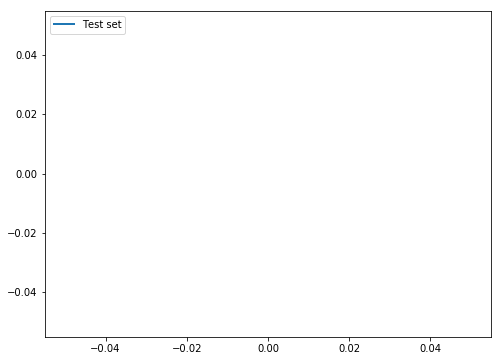

In [8]:
fig = plt.figure(figsize=(8,6))
subplot = fig.add_subplot(1,1,1)
subplot.plot(range(len(acc_vals)),acc_vals,linewidth=2,label='Test set')
subplot.legend(loc='upper left')

In [9]:
acc_vals

[]